<ipython-input-3-43ab4f535873>:18: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
<ipython-input-3-43ab4f535873>:28: RuntimeWarning: invalid value encountered in subtract
  w -= lr * grad


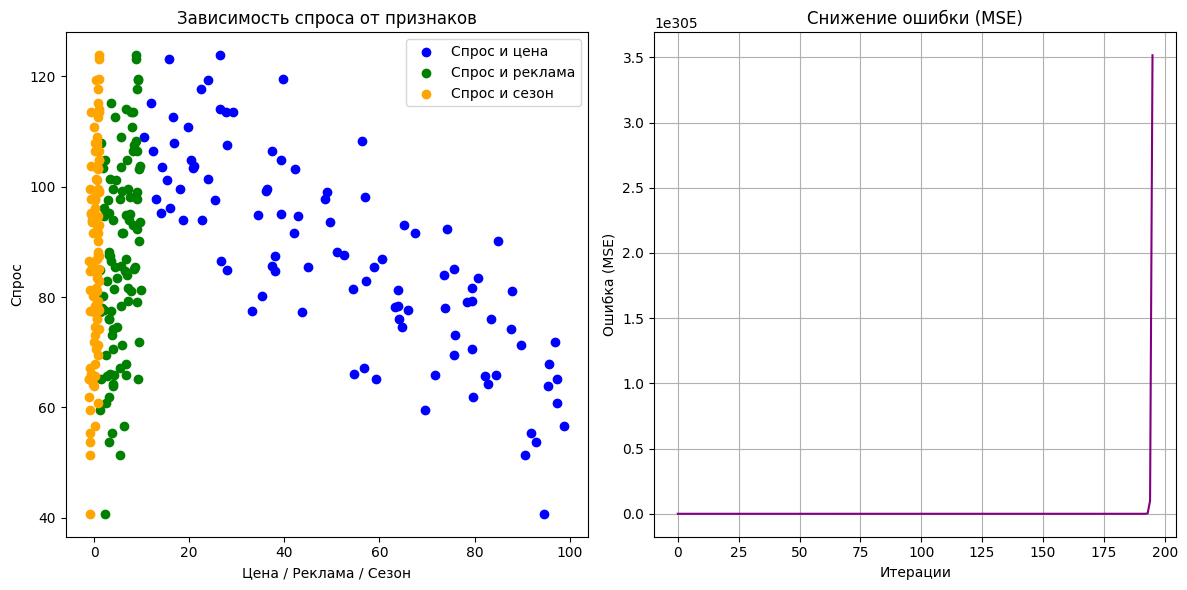

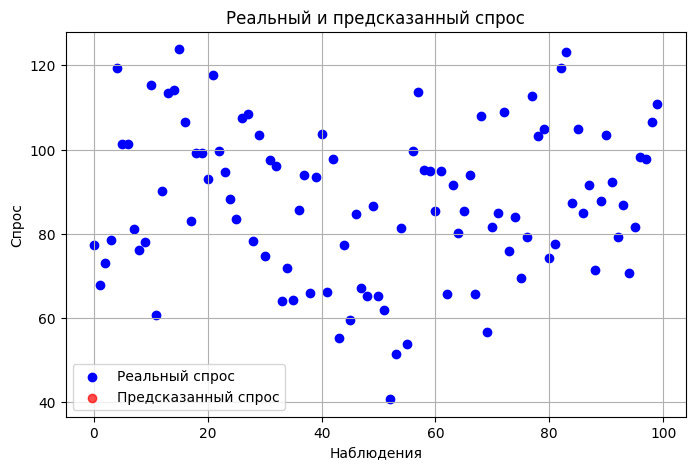

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Подготовка данных
np.random.seed(42)
n_samples = 100
price = np.random.uniform(10, 100, n_samples)          # Цена товара
advertising = np.random.uniform(1, 10, n_samples)       # Бюджет на рекламу
seasonality = np.sin(np.linspace(0, 3 * np.pi, n_samples)) # Сезонные колебания
noise = np.random.normal(0, 5, n_samples)               # Шум
demand = 100 - 0.5 * price + 2 * advertising + 10 * seasonality + noise

# Функции для предсказания, MSE и градиентного спуска
def predict(X, w):
    return np.dot(X, w)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_descent(X, y, lr=0.001, n_iterations=2000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    loss_history = []

    for i in range(n_iterations):
        y_pred = predict(X, w)
        grad = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
        w -= lr * grad
        loss = mse_loss(y, y_pred)
        loss_history.append(loss)

    return w, loss_history

# Добавление смещения и обучение модели
X = np.column_stack((np.ones(n_samples), price, advertising, seasonality))
w, loss_history = gradient_descent(X, demand)

# Предсказания модели
predicted_demand = predict(X, w)

# Визуализация 1: Реальные данные и зависимость спроса от признаков
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(price, demand, label='Спрос и цена', color='blue')
plt.scatter(advertising, demand, label='Спрос и реклама', color='green')
plt.scatter(seasonality, demand, label='Спрос и сезон', color='orange')
plt.title('Зависимость спроса от признаков')
plt.xlabel('Цена / Реклама / Сезон')
plt.ylabel('Спрос')
plt.legend()

# Визуализация 2: Снижение ошибки MSE
plt.subplot(1, 2, 2)
plt.plot(range(len(loss_history)), loss_history, color='purple')
plt.title('Снижение ошибки (MSE)')
plt.xlabel('Итерации')
plt.ylabel('Ошибка (MSE)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Визуализация 3: Сравнение реального и предсказанного спроса
plt.figure(figsize=(8, 5))
plt.scatter(range(n_samples), demand, label='Реальный спрос', color='blue')
plt.scatter(range(n_samples), predicted_demand, label='Предсказанный спрос', color='red', alpha=0.7)
plt.title('Реальный и предсказанный спрос')
plt.xlabel('Наблюдения')
plt.ylabel('Спрос')
plt.legend()
plt.grid(True)
plt.show()
